# Calcular el precio de una laptop dadas sus características (Problema de Regresión)

> PASO 1 - Adquirir los datos de las ventas de Laptops de Amazon

In [92]:
import pandas as pd

laptops = pd.read_csv("datasets/amazon_laptop_prices.csv")

laptops.head(5)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [93]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [94]:
100 - 100 * laptops["harddisk"].count() / len(laptops)

12.955465587044529

> PASO 2 - Selección de características

En un problema de regresión debemos considerar que las características sean valores continuos en su mayoría para que tenga sentido la regresión, es decir, el modelo busca generar una variable continua a partir de la combinación de otras variables continuas, por lo que debemos evitar valores categóricos o valores que puedan afectar el modelo continuo.

In [95]:
features = ["screen_size", "harddisk", "ram", "rating"]

In [96]:
laptops[ features ].sample(10)

,screen_size,harddisk,ram,rating
2157,14 Inches,1 TB,16 GB,4.5
2573,14 Inches,512 GB,16 GB,NaN
3158,15.6 Inches,1000 GB,20 GB,NaN
1933,15.6 Inches,NaN,32 GB,1.0
1652,15.6 Inches,NaN,32 GB,1.0
3480,15.6 Inches,NaN,32 GB,1.0
1979,15.66 Inches,NaN,32 GB,5.0
228,11.6 Inches,64 GB,4 GB,4.0
4403,14 Inches,1000 GB,8 GB,NaN
3891,14 Inches,1000 GB,8 GB,NaN


> PASO 3 - Limpieza de datos (normalizar las características)

In [97]:
texto = "16.66 Inches"

# Regular Expressions (Expresiones Regulares)
import re

# Pattern: \d+\.?\d*
match = re.match(r"[0-9]+\.?[0-9]*", texto)

valor = None

if not match == None:
    valor = float(match.group(0))
    
valor

16.66

In [98]:
def clean_screen_size(screen_size):
    if f"{screen_size}" == "nan":
        return None
    
    # Regular Expressions (Expresiones Regulares)
    import re
    
    # Pattern: \d+\.?\d*
    match = re.match(r"[0-9]+\.?[0-9]*", screen_size)
    
    valor = None
    
    if not match == None:
        valor = float(match.group(0))
        
    return valor

laptops["screen_size"] = laptops["screen_size"].map(clean_screen_size)

In [99]:
laptops[ features ]

,screen_size,harddisk,ram,rating
0,14.00,1000 GB,8 GB,NaN
1,15.60,1000 GB,64 GB,4.5
2,15.66,NaN,32 GB,5.0
3,13.30,256 GB,8 GB,4.8
4,15.30,256 GB,8 GB,4.8
...,...,...,...,...
4441,15.60,NaN,32 GB,1.0
4442,14.00,1000 GB,8 GB,NaN
4443,15.60,512 GB,8 GB,NaN
4444,14.00,512 GB,8 GB,NaN


In [100]:
laptops["screen_size"].min()

10.0

In [101]:
laptops["screen_size"].max()

27.0

In [102]:
laptops["screen_size"].mean()

15.074589087616028

In [103]:
laptops["screen_size"].std()

1.1903568304821281

In [104]:
import numpy as np

np.random.normal(laptops["screen_size"].mean(), laptops["screen_size"].std(), 5)

array([14.47647317, 16.37351562, 16.85061031, 16.29043499, 17.87429439])

In [105]:
laptops["screen_size"].unique()

array([14.  , 15.6 , 15.66, 13.3 , 15.3 , 16.  , 17.3 , 11.6 , 15.  ,
       13.4 , 18.  , 17.  , 16.2 , 13.6 , 14.4 , 13.  , 14.5 , 12.45,
       12.2 , 13.5 , 13.1 , 12.  ,   nan, 10.5 , 12.3 , 10.1 , 13.9 ,
       14.1 , 11.  , 12.4 , 15.4 , 12.5 , 16.1 , 22.  , 27.  , 10.  ])

In [106]:
laptops.groupby("screen_size")["screen_size"].agg("count")

screen_size
10.00       1
10.10       7
10.50       1
11.00       2
11.60      84
12.00       7
12.20       1
12.30       3
12.40       2
12.45       2
12.50      10
13.00      36
13.10       6
13.30     194
13.40      43
13.50      11
13.60       4
13.90       3
14.00    1113
14.10       9
14.40       1
14.50       4
15.00      25
15.30       1
15.40       3
15.60    1995
15.66     196
16.00     362
16.10       5
16.20       4
17.00      89
17.30     150
18.00      41
22.00       1
27.00       1
Name: screen_size, dtype: int64

In [107]:
pool = []

for screen_size, repeats in laptops.groupby("screen_size")["screen_size"].agg("count").items():
    pool.extend([screen_size] * repeats)
    
pool

[10.0,
 10.1,
 10.1,
 10.1,
 10.1,
 10.1,
 10.1,
 10.1,
 10.5,
 11.0,
 11.0,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 11.6,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.2,
 12.3,
 12.3,
 12.3,
 12.4,
 12.4,
 12.45,
 12.45,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.

In [108]:
laptops["screen_size"].dropna()

0       14.00
1       15.60
2       15.66
3       13.30
4       15.30
        ...  
4441    15.60
4442    14.00
4443    15.60
4444    14.00
4445    14.00
Name: screen_size, Length: 4417, dtype: float64

In [109]:
import random

random.choice(pool)

15.6

In [110]:
random.choice(laptops["screen_size"].dropna())

13.5

In [111]:
def fix_screen_size(screen_size):
    if f"{screen_size}" == "nan":
        return random.choice(list(laptops["screen_size"].dropna()))
    return screen_size

# Al reparar los datos faltantes del tamaño de pantalla
# supusimos que podía ser sustituido por algún tamaño aleatorio
# bajo la misma probabilidad (* Hipótesis 1)
laptops["screen_size"] = laptops["screen_size"].map(fix_screen_size)

laptops[ features ]

,screen_size,harddisk,ram,rating
0,14.00,1000 GB,8 GB,NaN
1,15.60,1000 GB,64 GB,4.5
2,15.66,NaN,32 GB,5.0
3,13.30,256 GB,8 GB,4.8
4,15.30,256 GB,8 GB,4.8
...,...,...,...,...
4441,15.60,NaN,32 GB,1.0
4442,14.00,1000 GB,8 GB,NaN
4443,15.60,512 GB,8 GB,NaN
4444,14.00,512 GB,8 GB,NaN


In [112]:
laptops.groupby("harddisk")["harddisk"].agg("count")

harddisk
1 TB        315
1.5 TB        1
1.92 TB       1
1000 GB    1334
1024 GB       2
1152 GB     177
120 GB        1
1256 GB       1
128 GB      114
128 MB        1
1512 GB       1
16 GB         8
160 GB        4
2 TB        124
2000 GB     165
2048 GB       1
240 GB        2
250 GB        1
256           1
256 GB      476
3 TB          1
300 GB        1
32 GB        48
32 MB         1
320 GB        8
4 TB         26
4000 GB      47
480 GB        2
500 GB       34
512           1
512 GB      747
512 MB        1
6000 GB       3
64            1
64 GB       194
64 MB         1
640 GB        1
65 GB         1
8 GB          2
8 TB          2
8000 GB      18
Name: harddisk, dtype: int64

In [113]:
def clean_harddisk(harddisk):
    if f"{harddisk}" == "nan":
        return None
    import re
    if not re.search(r"MB", harddisk) == None:
        match = re.search(r"\d+.?\d*", harddisk)
        if not match == None:
            valor = float(match.group(0))
            return valor / 1000
    elif not re.search(r"GB", harddisk) == None:
        match = re.search(r"\d+.?\d*", harddisk)
        if not match == None:
            valor = float(match.group(0))
            return valor
    elif not re.search(r"TB", harddisk) == None:
        match = re.search(r"\d+.?\d*", harddisk)
        if not match == None:
            valor = float(match.group(0))
            return valor * 1000
    return None

laptops["harddisk"] = laptops["harddisk"].map(clean_harddisk)

laptops[ features ]

,screen_size,harddisk,ram,rating
0,14.00,1000.0,8 GB,NaN
1,15.60,1000.0,64 GB,4.5
2,15.66,NaN,32 GB,5.0
3,13.30,256.0,8 GB,4.8
4,15.30,256.0,8 GB,4.8
...,...,...,...,...
4441,15.60,NaN,32 GB,1.0
4442,14.00,1000.0,8 GB,NaN
4443,15.60,512.0,8 GB,NaN
4444,14.00,512.0,8 GB,NaN


In [186]:
random.choice(list(laptops["harddisk"].dropna()))

256.0

In [187]:
def fix_harddisk(harddisk):
    import random
    if f"{harddisk}" == "nan":
        return random.choice(list(laptops["harddisk"].dropna()))
    return harddisk

laptops["harddisk"] = laptops["harddisk"].map(fix_harddisk)

laptops[ features ]

,screen_size,harddisk,ram,rating
0,14.00,1000.0,8 GB,NaN
1,15.60,1000.0,64 GB,4.5
2,15.66,512.0,32 GB,5.0
3,13.30,256.0,8 GB,4.8
4,15.30,256.0,8 GB,4.8
...,...,...,...,...
4441,15.60,1000.0,32 GB,1.0
4442,14.00,1000.0,8 GB,NaN
4443,15.60,512.0,8 GB,NaN
4444,14.00,512.0,8 GB,NaN


In [189]:
def clean_ram(ram):
    if f"{ram}" == "nan":
        return None
    import re
    if not re.search(r"MB", ram) == None:
        match = re.search(r"\d+.?\d*", ram)
        if not match == None:
            valor = float(match.group(0))
            return valor / 1000
    elif not re.search(r"GB", ram) == None:
        match = re.search(r"\d+.?\d*", ram)
        if not match == None:
            valor = float(match.group(0))
            return valor
    elif not re.search(r"TB", ram) == None:
        match = re.search(r"\d+.?\d*", ram)
        if not match == None:
            valor = float(match.group(0))
            return valor * 1000
    return None

laptops["ram"] = laptops["ram"].map(clean_ram)

laptops[ features ]

,screen_size,harddisk,ram,rating
0,14.00,1000.0,8.0,1.0
1,15.60,1000.0,64.0,4.5
2,15.66,512.0,32.0,5.0
3,13.30,256.0,8.0,4.8
4,15.30,256.0,8.0,4.8
...,...,...,...,...
4441,15.60,1000.0,32.0,1.0
4442,14.00,1000.0,8.0,1.0
4443,15.60,512.0,8.0,4.5
4444,14.00,512.0,8.0,4.5


In [191]:
def fix_ram(ram):
    import random
    if f"{ram}" == "nan":
        return random.choice(list(laptops["ram"].dropna()))
    return ram

laptops["ram"] = laptops["ram"].map(fix_ram)

laptops[ features ]

,screen_size,harddisk,ram,rating
0,14.00,1000.0,8.0,1.0
1,15.60,1000.0,64.0,4.5
2,15.66,512.0,32.0,5.0
3,13.30,256.0,8.0,4.8
4,15.30,256.0,8.0,4.8
...,...,...,...,...
4441,15.60,1000.0,32.0,1.0
4442,14.00,1000.0,8.0,1.0
4443,15.60,512.0,8.0,4.5
4444,14.00,512.0,8.0,4.5


In [188]:
def fix_rating(rating):
    import random
    if f"{rating}" == "nan":
        return random.choice(list(laptops["rating"].dropna()))
    return rating

laptops["rating"] = laptops["rating"].map(fix_rating)

laptops[ features ]

,screen_size,harddisk,ram,rating
0,14.00,1000.0,8 GB,1.0
1,15.60,1000.0,64 GB,4.5
2,15.66,512.0,32 GB,5.0
3,13.30,256.0,8 GB,4.8
4,15.30,256.0,8 GB,4.8
...,...,...,...,...
4441,15.60,1000.0,32 GB,1.0
4442,14.00,1000.0,8 GB,1.0
4443,15.60,512.0,8 GB,4.5
4444,14.00,512.0,8 GB,4.5


In [192]:
X = laptops[ features ].values

X

array([[  14.  , 1000.  ,    8.  ,    1.  ],
       [  15.6 , 1000.  ,   64.  ,    4.5 ],
       [  15.66,  512.  ,   32.  ,    5.  ],
       ...,
       [  15.6 ,  512.  ,    8.  ,    4.5 ],
       [  14.  ,  512.  ,    8.  ,    4.5 ],
       [  14.  ,  256.  ,   16.  ,    4.5 ]])

In [193]:
laptops["price"]

0         $589.99 
1         $999.99 
2       $1,599.00 
3         $689.99 
4       $1,144.48 
           ...    
4441    $1,699.00 
4442      $589.99 
4443      $591.99 
4444    $1,771.99 
4445      $938.99 
Name: price, Length: 4446, dtype: object

In [195]:
def clean_price(price):
    if f"{price}" == "nan":
        return None
    return float(price.replace("$", "").replace(",", ""))

laptops["price"] = laptops["price"].map(clean_price)

laptops["price"]

0        589.99
1        999.99
2       1599.00
3        689.99
4       1144.48
         ...   
4441    1699.00
4442     589.99
4443     591.99
4444    1771.99
4445     938.99
Name: price, Length: 4446, dtype: float64

In [198]:
columns = ["price"]
columns.extend(features)

laptops_analysis = laptops[ columns ].dropna()

laptops_analysis

,price,screen_size,harddisk,ram,rating
0,589.99,14.00,1000.0,8.0,1.0
1,999.99,15.60,1000.0,64.0,4.5
2,1599.00,15.66,512.0,32.0,5.0
3,689.99,13.30,256.0,8.0,4.8
4,1144.48,15.30,256.0,8.0,4.8
...,...,...,...,...,...
4441,1699.00,15.60,1000.0,32.0,1.0
4442,589.99,14.00,1000.0,8.0,1.0
4443,591.99,15.60,512.0,8.0,4.5
4444,1771.99,14.00,512.0,8.0,4.5


In [199]:
X = laptops_analysis[ features ].values
y = laptops_analysis["price"].values

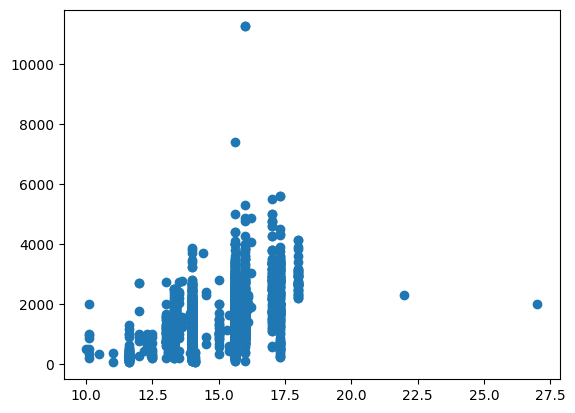

In [202]:
import matplotlib.pyplot as plt

plt.plot(X[:,0], y, "o")
plt.show()

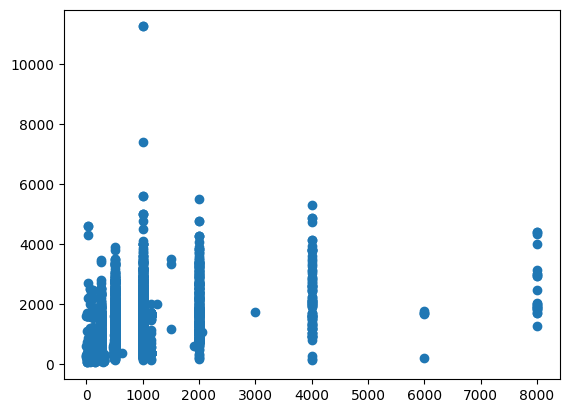

In [203]:
import matplotlib.pyplot as plt

plt.plot(X[:,1], y, "o")
plt.show()

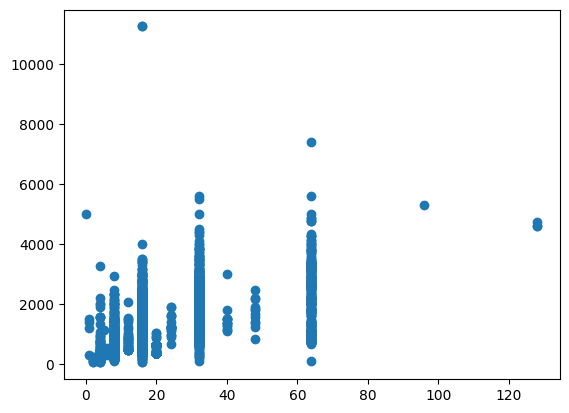

In [204]:
import matplotlib.pyplot as plt

plt.plot(X[:,2], y, "o")
plt.show()

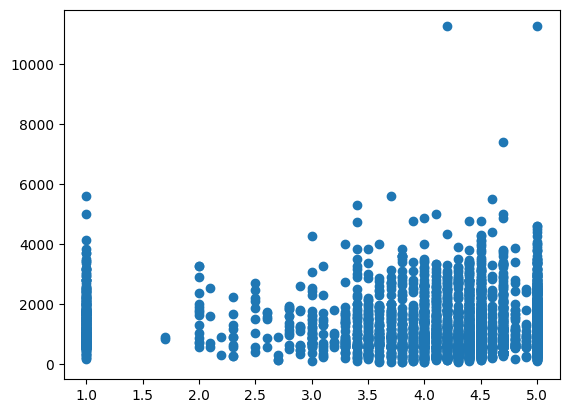

In [205]:
import matplotlib.pyplot as plt

plt.plot(X[:,3], y, "o")
plt.show()